## Notebook for plotting EIS data

This notebook is aimed at quickly visualizing EIS data from the GAMRY instrument, which can be found on the lab computer in the "GAMRY_data" folder as .txt files.

### Package importation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Plotting all files on the same graph

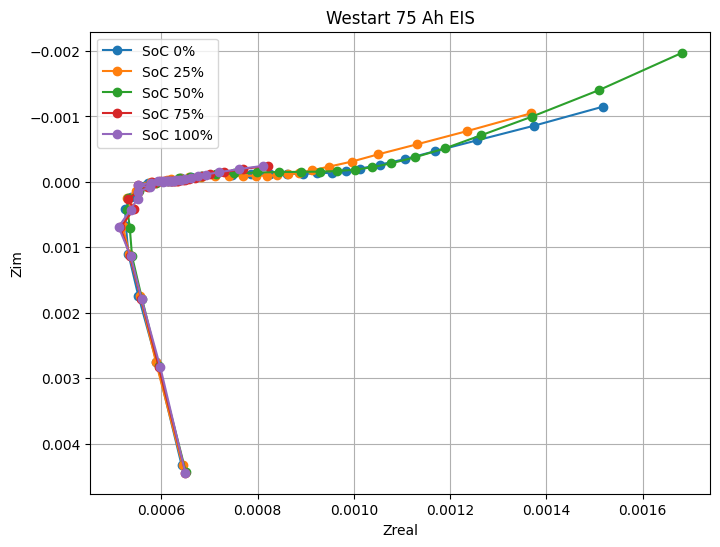

In [3]:
# Create a new figure
plt.figure(figsize=(8, 6))
soc_values = np.array([0,25,50,75,100])

# Loop through files with the new naming convention
for soc in soc_values:
    file_name = f"Data/EIS/0050_EIS_+Westart_PEHV75AH_{soc}%.txt"
    # Read the data while skipping the first rows (header)
    df = pd.read_csv(file_name, skiprows=183, header=None, sep='\t', encoding='ISO-8859-1')
    plt.plot(df.iloc[:, 4], df.iloc[:, 5], '-o', label=f"SoC {soc}%")


plt.xlabel("Zreal")
plt.ylabel("Zim")
plt.title("Westart 75 Ah EIS")
plt.legend()
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

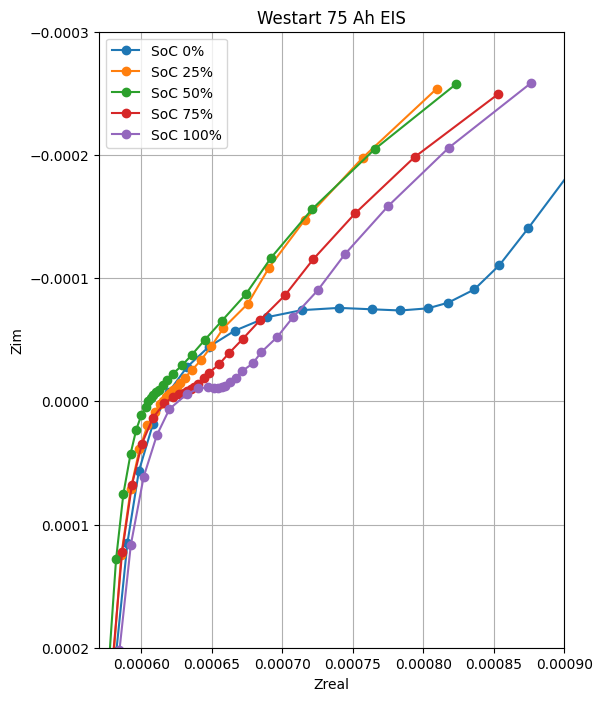

In [18]:
# Create a new figure
plt.figure(figsize=(6, 8))

# Define step values and their corresponding SoC values
step_to_soc = {'004': 0, '007': 25, '010': 50, '013': 75, '016': 100}

# Loop through files with the new naming convention
for step, soc in step_to_soc.items():
    file_name = f"Data/Westart Redo/EIS/0050_EIS+Westart_PEHV75AH_3_1_Chan001_Cycle001_Step{step}.txt"
    # Read the data while skipping the first rows (header)
    df = pd.read_csv(file_name, skiprows=65, header=None, sep='\t', encoding='ISO-8859-1')
    plt.plot(df.iloc[:, 4], df.iloc[:, 5], '-o', label=f"SoC {soc}%")

plt.xlabel("Zreal")
plt.ylabel("Zim")
plt.title("Westart 75 Ah EIS")
plt.xlim([0.00057,0.0009])
plt.ylim([-0.0003,0.0002])
plt.legend()
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


### Plotting one single graph

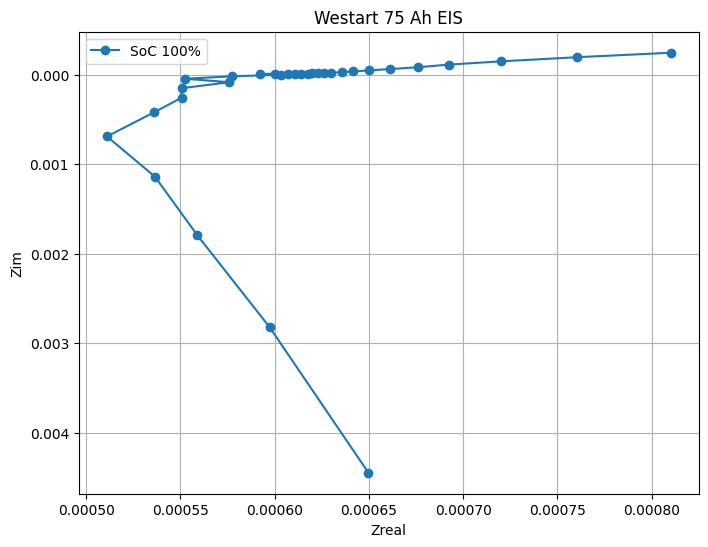

In [2]:
# Enter the soc you want to plot
soc = 100


file_name = f"Data/EIS/0050_EIS_+Westart_PEHV75AH_{soc}%.txt"
df = pd.read_csv(file_name, skiprows=183, header=None, sep='\t', encoding='ISO-8859-1')
    

# Create a new figure
plt.figure(figsize=(8, 6))
plt.plot(df.iloc[:, 4], df.iloc[:, 5], '-o', label=f"SoC {soc}%")
plt.xlabel("Zreal")
plt.ylabel("Zim")
plt.title("Westart 75 Ah EIS")
plt.legend()
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [5]:
import pandas as pd

file = "Data/EIS/0050_EIS+Westart_PEHV75AH_Chan001_Cycle001_Step010.DTA"
eis_results = []
start_extracting = False

with open(file, 'r') as f:
    for line in f:
        values = line.strip().split('\t')
        if ' '.join(values) == 'ZCURVE TABLE':
            start_extracting = True
            continue
        if start_extracting and len(values) >= 7:
            eis_results.append(values)

# Remove the second line as requested
del eis_results[1]

# Use the first line as header and the remaining as data
header = eis_results[0]
data = eis_results[1:]

# Convert data to float
data_float = [[float(item) for item in row] for row in data]

# Create a DataFrame
df = pd.DataFrame(data_float, columns=header)

print(df)

      Pt   Time          Freq     Zreal     Zimag  Zsig      Zmod       Zphz  \
0    0.0    1.0  10078.130000  0.000709 -0.001384   1.0  0.001556 -62.878040   
1    1.0    2.0   6328.125000  0.000620 -0.000827   1.0  0.001034 -53.115370   
2    2.0    4.0   3984.375000  0.000566 -0.000501   1.0  0.000755 -41.519030   
3    3.0    5.0   2527.573000  0.000535 -0.000312   1.0  0.000620 -30.256820   
4    4.0    7.0   1577.524000  0.000518 -0.000201   1.0  0.000556 -21.225610   
5    5.0    8.0    998.264000  0.000521 -0.000138   1.0  0.000539 -14.866080   
6    6.0   10.0    627.790200  0.000525 -0.000096   1.0  0.000533 -10.315870   
7    7.0   11.0    397.995300  0.000527 -0.000073   1.0  0.000532  -7.890484   
8    8.0   12.0    252.403800  0.000535 -0.000059   1.0  0.000538  -6.328497   
9    9.0   14.0    158.361500  0.000544 -0.000051   1.0  0.000547  -5.355085   
10  10.0   15.0    100.446400  0.000554 -0.000047   1.0  0.000556  -4.851584   
11  11.0   17.0     63.344600  0.000563 

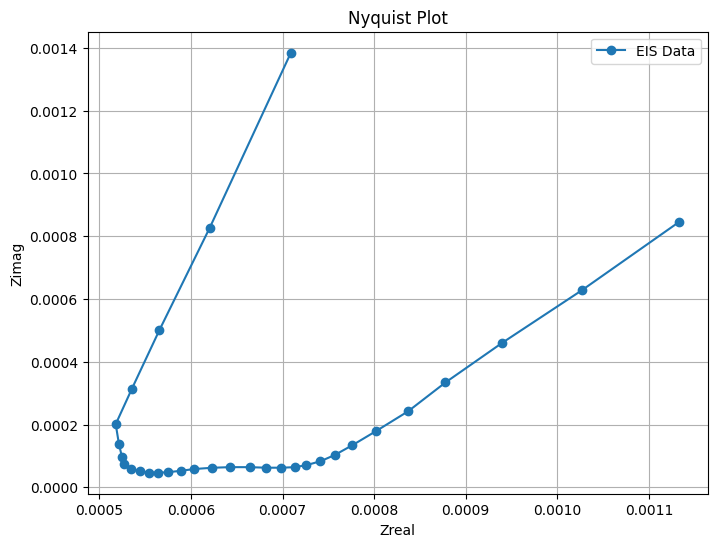

In [9]:
import matplotlib.pyplot as plt
z_real = df['Zreal']
z_imag = df['Zimag']

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(z_real, -z_imag, '-o', label='EIS Data')
plt.xlabel('Zreal')
plt.ylabel('Zimag')
plt.title('Nyquist Plot')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from galvani import BioLogic as BL
file = f"Data/EIS/0018_3_1_EIS_LG_02_MB_CB1.mpr"
mpr = BL.MPRfile(file)
df = pd.DataFrame(mpr.data)
df.head(15)

,flags,Ns,I Range,time/s,control/V/mA,Ewe/V,I/mA,dQ/mA.h,(Q-Qo)/mA.h,Energy/W.h,...,|Z|/Ohm,Phase(Z)/deg,Q charge/discharge/mA.h,half cycle,Temperature/°C,z cycle,Energy charge/W.h,Energy discharge/W.h,Capacitance charge/µF,Capacitance discharge/µF
0,17,0,113,18307.716870,-970.000061,4.154849,-970.312012,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0,19.470865,0,0.0,0.000000,0.0,0.000000e+00
1,17,0,113,18309.006870,-970.000061,4.144845,-970.134583,-0.347642,-0.347642,-0.001441,...,0.0,0.0,-0.347642,0,19.518164,0,0.0,-0.001441,0.0,0.000000e+00
2,17,0,113,18320.188870,-970.000061,4.134841,-970.233154,-3.013443,-3.361084,-0.013901,...,0.0,0.0,-3.361084,0,19.281673,0,0.0,-0.013901,0.0,1.209559e+09
3,17,0,113,18341.938871,-970.000061,4.124838,-970.174072,-5.861406,-9.222490,-0.038078,...,0.0,0.0,-9.222490,0,19.415684,0,0.0,-0.038078,0.0,1.659496e+09
4,17,0,113,18374.512873,-970.000061,4.114835,-970.233154,-8.778350,-18.000840,-0.074200,...,0.0,0.0,-18.000840,0,19.723122,0,0.0,-0.074200,0.0,2.159365e+09
5,17,0,113,18418.988875,-970.000061,4.104831,-970.213440,-11.985835,-29.986675,-0.123400,...,0.0,0.0,-29.986675,0,19.849249,0,0.0,-0.123400,0.0,2.697871e+09
6,17,0,113,18476.318878,-970.000061,4.094828,-970.036072,-15.449852,-45.436527,-0.186664,...,0.0,0.0,-45.436527,0,20.069973,0,0.0,-0.186664,0.0,3.270295e+09
7,17,0,113,18546.664881,-970.000061,4.084825,-970.154297,-18.957486,-64.394013,-0.264102,...,0.0,0.0,-64.394013,0,20.361643,0,0.0,-0.264102,0.0,3.862325e+09
8,17,0,113,18631.704885,-970.000061,4.074781,-970.075439,-22.917329,-87.311341,-0.357485,...,0.0,0.0,-87.311341,0,20.314344,0,0.0,-0.357485,0.0,4.486222e+09
9,17,0,113,18733.562890,-970.000061,4.064778,-970.252930,-27.449683,-114.761025,-0.469062,...,0.0,0.0,-114.761025,0,20.432590,0,0.0,-0.469062,0.0,5.159945e+09


In [2]:
from galvani import BioLogic as BL
import pandas as pd
file = f"Data/data_for_testing/0039_1_43_KOK_15_EIS_-10 degC_CC8.mpr"
mpr = BL.MPRfile(file)
df = pd.DataFrame(mpr.data)
df.head(15)

,freq/Hz,Re(Z)/Ohm,-Im(Z)/Ohm,|Z|/Ohm,Phase(Z)/deg,time/s,Ewe/V,I/mA,Cs/µF,Cp/µF,cycle number,|Ewe|/V,|I|/A,Ns,I Range
0,10001.000000,-0.053963,0.007197,0.054441,-172.403488,3.280000,4.366094,11993.047852,2211.217773,38.642845,0.0,0.003170,0.058222,0,112
1,8578.000000,0.002928,-0.001113,0.003132,20.807747,6.482000,4.377079,11975.525391,-16674.544922,-2104.173096,0.0,0.000258,0.082360,0,112
2,7356.998535,0.003023,-0.000815,0.003131,15.090676,9.684000,4.384246,11923.940430,-26537.320312,-1798.719971,0.0,0.000366,0.116848,0,112
3,6311.000000,0.003038,-0.000547,0.003086,10.198732,12.888001,4.389837,12129.490234,-46145.605469,-1446.724487,0.0,0.000503,0.163123,0,112
4,5413.000000,0.003067,-0.000328,0.003084,6.101940,16.090001,4.393735,11850.698242,-89677.257812,-1013.281982,0.0,0.000694,0.225038,0,112
5,4642.999023,0.003118,-0.000113,0.003120,2.073268,19.296001,4.398973,12250.967773,-303718.937500,-397.509735,0.0,0.000955,0.305982,0,112
6,3982.000000,0.003190,0.000055,0.003190,-0.989839,22.500001,4.401571,12364.768555,725266.562500,216.440353,0.0,0.001304,0.408843,0,112
7,3416.000244,0.003224,0.000240,0.003233,-4.252450,25.702001,4.402989,11970.996094,194335.187500,1068.530762,0.0,0.001731,0.535419,0,112
8,2929.999023,0.003267,0.000383,0.003289,-6.681859,28.912001,4.408935,11569.742188,141927.453125,1921.524902,0.0,0.002265,0.688478,0,112
9,2512.999268,0.003343,0.000528,0.003384,-8.982247,32.116002,4.411455,11563.638672,119862.156250,2921.770752,0.0,0.002936,0.867482,0,112


In [6]:
eis = pd.read_csv('Data/data_for_testing/0039_1_43_KOK_15_EIS_-10 degC_CC8.txt', delimiter = '\t')
eis.head()

,time/s,Ecell/V,I/mA,Unnamed: 3,Unnamed: 4,Unnamed: 5,cycle number,Unnamed: 7,Unnamed: 8,Ns,freq/Hz,Re(Z)/Ohm,-Im(Z)/Ohm,Unnamed: 13
0,11.26.2023 21:40:50.333,4.366094,11993.048,0,0,0,0.0,0,0,0,10001.0000,-0.053963,0.007197,NaN
1,11.26.2023 21:40:53.535,4.377079,11975.525,0,0,0,0.0,0,0,0,8578.0000,0.002928,-0.001113,NaN
2,11.26.2023 21:40:56.737,4.384246,11923.940,0,0,0,0.0,0,0,0,7356.9985,0.003023,-0.000815,NaN
3,11.26.2023 21:40:59.941,4.389837,12129.490,0,0,0,0.0,0,0,0,6311.0000,0.003038,-0.000547,NaN
4,11.26.2023 21:41:03.143,4.393735,11850.698,0,0,0,0.0,0,0,0,5413.0000,0.003067,-0.000328,NaN
